# when you want to die this is how 
conda activate env_name

pip install ipykernel --user

python -m ipykernel install --user --name env_name --display-name env_name

In [8]:
!pip install matplotlib

  Using cached matplotlib-3.5.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached kiwisolver-1.4.3-cp310-cp310-win_amd64.whl (55 kB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [35]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import pathlib
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [36]:
data_dir = pathlib.Path('D:\DATA_UPLOAD')
data_dir

WindowsPath('D:/DATA_UPLOAD')

In [37]:
image_size = (500, 500)
batch_size = 32

In [63]:
Training_Data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size = (500, 500),
    batch_size = 32,
    validation_split = 0.2,
    subset = 'training',
    seed = 42
)

Found 745 files belonging to 24 classes.
Using 596 files for training.


In [64]:
Validation_Data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size = (500, 500),
    batch_size = 32,
    validation_split = 0.2,
    subset = 'validation',
    seed = 42
)

Found 745 files belonging to 24 classes.
Using 149 files for validation.


In [65]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [66]:
normalized_ds = Training_Data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
# Notice the pixel values are now in `[0,1]`.
print(np.min(image_batch[0]), np.max(image_batch[0]))


0.0017838614 1.0


In [67]:
AUTOTUNE = tf.data.AUTOTUNE

Training_Data = Training_Data.cache().prefetch(buffer_size=AUTOTUNE)
Validation_Data = Validation_Data.cache().prefetch(buffer_size=AUTOTUNE)

In [70]:
num_classes = 24

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, (3, 3), 1, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, (3, 3), 1, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, (3, 3), 1, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])



In [71]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [72]:
history = model.fit(
  Training_Data,
  validation_data=Validation_Data,
  epochs=7
)

Epoch 1/7
19/19 [==============================] - 8s 389ms/step - loss: 3.5739 - accuracy: 0.1527 - val_loss: 2.8418 - val_accuracy: 0.2013
Epoch 2/7
19/19 [==============================] - 4s 207ms/step - loss: 2.6443 - accuracy: 0.2433 - val_loss: 2.7276 - val_accuracy: 0.2013
Epoch 3/7
19/19 [==============================] - 4s 207ms/step - loss: 2.4850 - accuracy: 0.2685 - val_loss: 2.6596 - val_accuracy: 0.2148
Epoch 4/7
19/19 [==============================] - 4s 206ms/step - loss: 2.0803 - accuracy: 0.3591 - val_loss: 2.6843 - val_accuracy: 0.2617
Epoch 5/7
19/19 [==============================] - 4s 207ms/step - loss: 1.4545 - accuracy: 0.5503 - val_loss: 2.7022 - val_accuracy: 0.2752
Epoch 6/7
19/19 [==============================] - 4s 208ms/step - loss: 0.8708 - accuracy: 0.7416 - val_loss: 3.5802 - val_accuracy: 0.2483
Epoch 7/7
19/19 [==============================] - 4s 207ms/step - loss: 0.5087 - accuracy: 0.8356 - val_loss: 3.4319 - val_accuracy: 0.2483


In [26]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


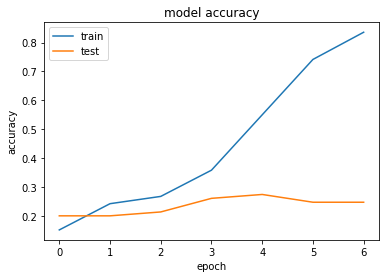

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

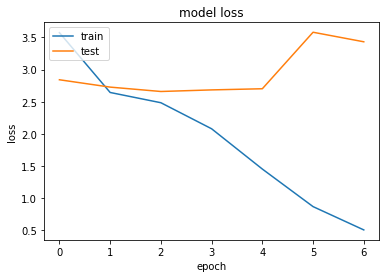

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()